In [7]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')  # To suppress warnings


In [4]:
# Read the CSV file
df = pd.read_csv('/Users/lukishyadav/Desktop/Engineering/case_study/ai_strike/data/data_head/df_head_500.csv')
df = pd.read_csv('/Users/lukishyadav/Desktop/Engineering/case_study/ai_strike/data/GUIDE_Train.csv')


Daily Incident Counts:
Timestamp
2024-05-20    1
2024-05-21    4
2024-05-22    1
2024-05-23    5
2024-05-24    3
dtype: int64


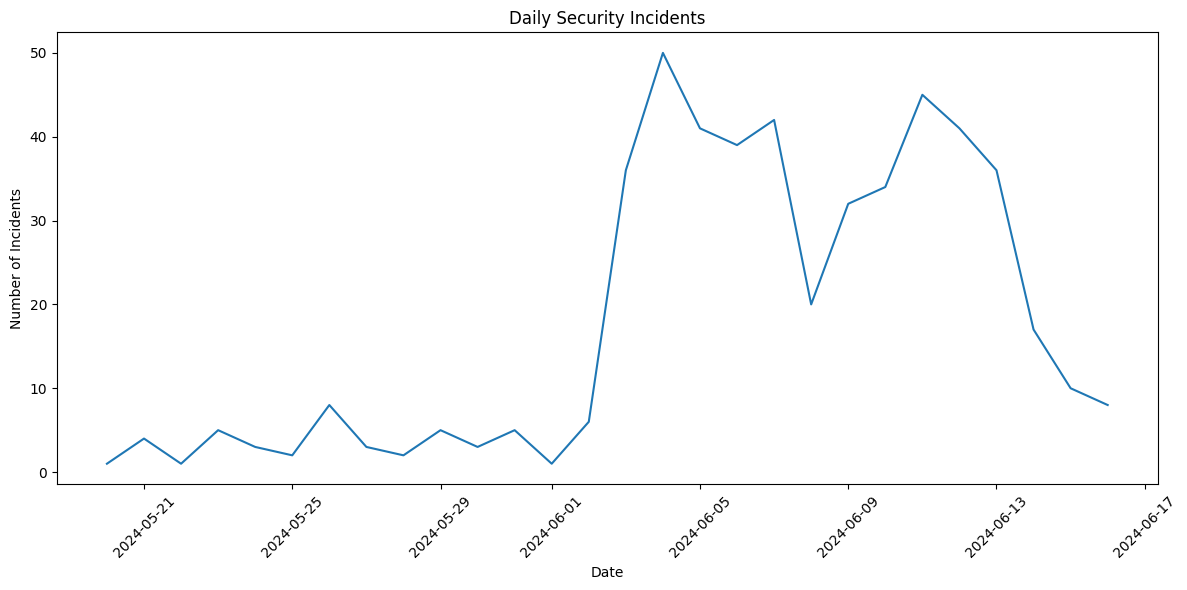

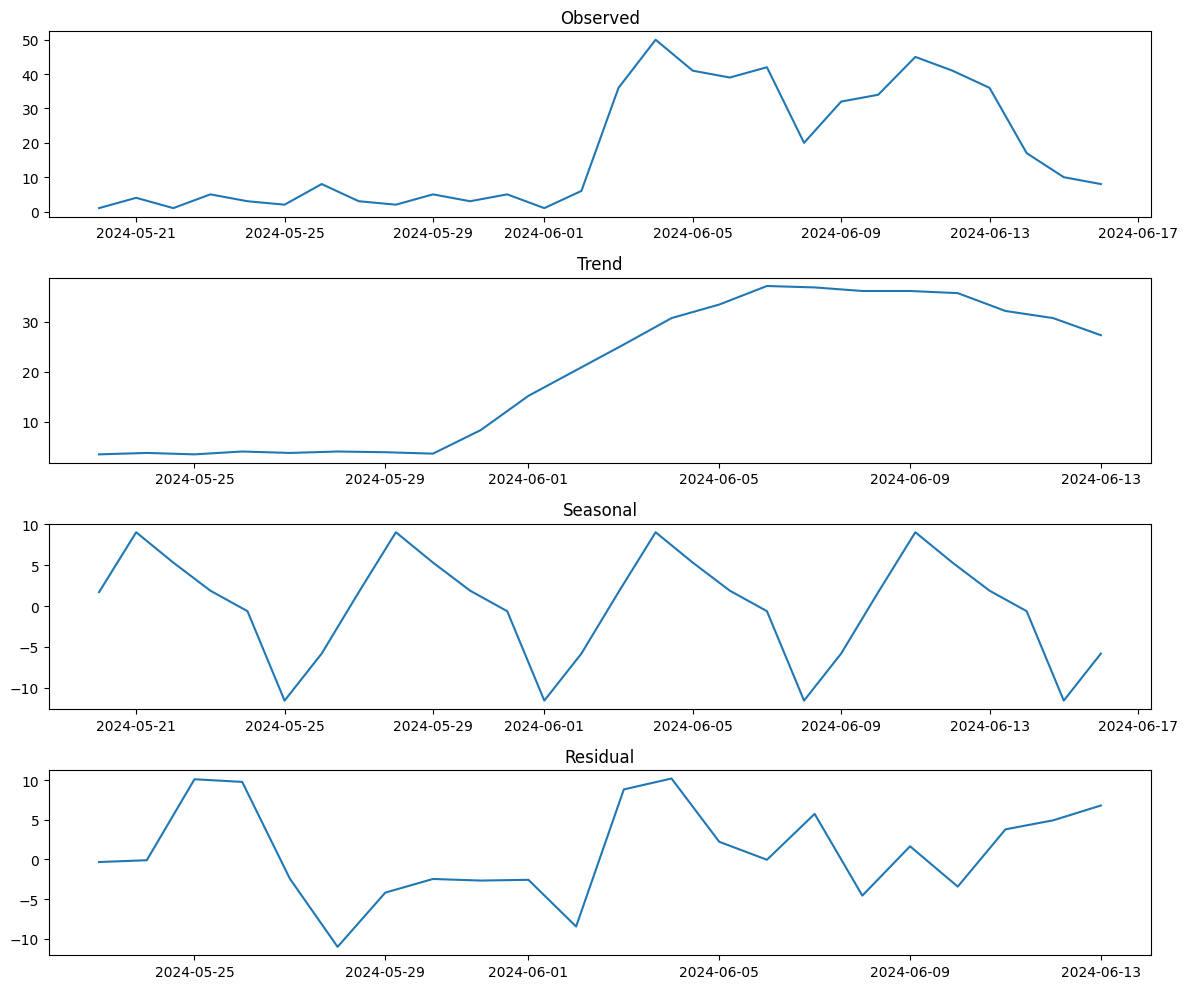


Hourly Incident Counts:
Timestamp
0     18
1     24
2     21
3     11
4     15
5     19
6     14
7     13
8     21
9     17
10    22
11    19
12    19
13    31
14    30
15    26
16    26
17    29
18    29
19    28
20    14
21    21
22    19
23    14
dtype: int64


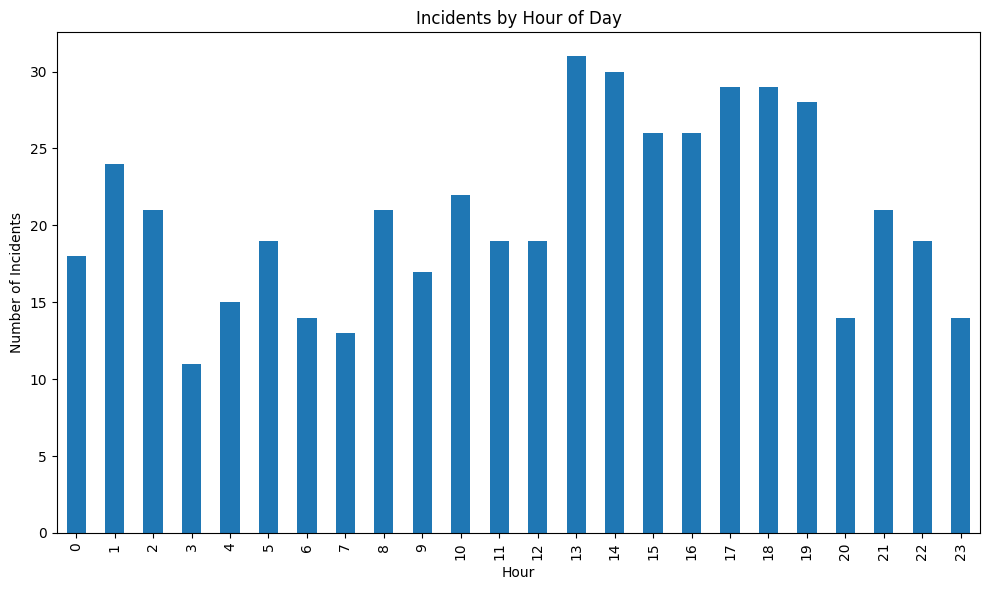


Decomposition Statistics:
Trend mean: 19.779220779220775
Seasonal mean: -1.9032394707859825e-16
Residual mean: 0.9982993197278934
Residual std: 6.003353182439509

Peak Incident Days:


In [8]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Create time series of incident counts per day
incidents_per_day = df.groupby(df['Timestamp'].dt.date).size()
print("\nDaily Incident Counts:")
print(incidents_per_day.head())

# Define and run the time series analysis function
def analyze_time_series(incidents_per_day):
    # Plot daily incidents
    plt.figure(figsize=(12, 6))
    incidents_per_day.plot()
    plt.title('Daily Security Incidents')
    plt.xlabel('Date')
    plt.ylabel('Number of Incidents')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Decompose time series
    # period=7 assumes weekly patterns, adjust if needed
    decomposition = seasonal_decompose(incidents_per_day, period=7)
    
    # Plot decomposition
    plt.figure(figsize=(12, 10))
    
    plt.subplot(411)
    plt.plot(decomposition.observed)
    plt.title('Observed')
    
    plt.subplot(412)
    plt.plot(decomposition.trend)
    plt.title('Trend')
    
    plt.subplot(413)
    plt.plot(decomposition.seasonal)
    plt.title('Seasonal')
    
    plt.subplot(414)
    plt.plot(decomposition.resid)
    plt.title('Residual')
    
    plt.tight_layout()
    plt.show()
    
    return decomposition

# Run the analysis
decomposition = analyze_time_series(incidents_per_day)

# Analyze hourly patterns
incidents_per_hour = df.groupby(df['Timestamp'].dt.hour).size()
print("\nHourly Incident Counts:")
print(incidents_per_hour)

# Plot hourly patterns
plt.figure(figsize=(10, 6))
incidents_per_hour.plot(kind='bar')
plt.title('Incidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Incidents')
plt.tight_layout()
plt.show()

# Additional analysis: Get statistics about the decomposition
print("\nDecomposition Statistics:")
print("Trend mean:", decomposition.trend.mean())
print("Seasonal mean:", decomposition.seasonal.mean())
print("Residual mean:", decomposition.resid.mean())
print("Residual std:", decomposition.resid.std())

# Find peak incident days
peak_days = incidents_per_day[incidents_per_day > incidents_per_day.mean() + incidents_per_day.std()]
print("\nPeak Incident Days:")


In [10]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')  # To suppress warnings

def analyze_org_entitytype_timeseries(df, top_n=10):
    """
    Comprehensive time series analysis for OrgId-EntityType combinations
    """
    try:
        # 1. Data Preparation
        print("Preparing data...")
        if not pd.api.types.is_datetime64_any_dtype(df['Timestamp']):
            df['Timestamp'] = pd.to_datetime(df['Timestamp'])
        
        # Create OrgId-EntityType combination
        df['OrgEntityType'] = df['OrgId'].astype(str) + '-' + df['EntityType'].astype(str)
        
        # Get top combinations
        top_combinations = df['OrgEntityType'].value_counts().head(top_n)
        print(f"\nAnalyzing top {len(top_combinations)} Org-EntityType combinations...")
        
        # Print initial summary
        print("\nMost common Org-EntityType combinations:")
        for combo, count in top_combinations.items():
            org, entity_type = combo.split('-')
            print(f"Org {org} - EntityType {entity_type}: {count} incidents")
        
        # 2. Time Series Creation
        # Daily series
        daily_series = df.groupby([
            df['Timestamp'].dt.date,
            'OrgEntityType'
        ]).size().unstack(fill_value=0)
        
        # Hourly series
        hourly_series = df.groupby([
            df['Timestamp'].dt.hour,
            'OrgEntityType'
        ]).size().unstack(fill_value=0)
        
        # Weekly series
        weekly_series = df.groupby([
            pd.Grouper(key='Timestamp', freq='W'),
            'OrgEntityType'
        ]).size().unstack(fill_value=0)
        
        # 3. Visualization and Analysis
        # 3.1 Daily Patterns
        fig = go.Figure()
        for combo in top_combinations.index:
            org, entity_type = combo.split('-')
            fig.add_trace(
                go.Scatter(
                    x=daily_series.index,
                    y=daily_series[combo],
                    name=f"Org {org} - {entity_type}",
                    mode='lines',
                    hovertemplate=(
                        "Date: %{x}<br>" +
                        "Incidents: %{y}<br>" +
                        f"Org: {org}<br>" +
                        f"EntityType: {entity_type}<extra></extra>"
                    )
                )
            )
        
        fig.update_layout(
            title='Daily Activity Patterns by Org-EntityType Combination',
            xaxis_title='Date',
            yaxis_title='Number of Incidents',
            hovermode='x unified',
            height=600,
            showlegend=True
        )
        fig.show()
        
        # 3.2 Hourly Patterns
        fig = go.Figure()
        for combo in top_combinations.index:
            org, entity_type = combo.split('-')
            fig.add_trace(
                go.Scatter(
                    x=hourly_series.index,
                    y=hourly_series[combo],
                    name=f"Org {org} - {entity_type}",
                    mode='lines+markers',
                    hovertemplate=(
                        "Hour: %{x}<br>" +
                        "Incidents: %{y}<br>" +
                        f"Org: {org}<br>" +
                        f"EntityType: {entity_type}<extra></extra>"
                    )
                )
            )
        
        fig.update_layout(
            title='Hourly Activity Patterns by Org-EntityType Combination',
            xaxis_title='Hour of Day',
            yaxis_title='Number of Incidents',
            hovermode='x unified',
            height=600,
            showlegend=True
        )
        fig.show()
        
        # 3.3 Time Series Decomposition
        print("\nPerforming time series decomposition...")
        for combo in top_combinations.index:
            org, entity_type = combo.split('-')
            combo_series = daily_series[combo]
            
            if len(combo_series) >= 14:  # Need at least 2 weeks
                try:
                    # Perform decomposition
                    decomposition = seasonal_decompose(combo_series, period=7)
                    
                    # Plot decomposition components separately
                    # Original Series
                    fig = go.Figure()
                    fig.add_trace(go.Scatter(
                        x=combo_series.index,
                        y=combo_series,
                        name='Original',
                        line=dict(color='blue')
                    ))
                    fig.update_layout(
                        title=f'Original Time Series - Org {org} - {entity_type}',
                        xaxis_title='Date',
                        yaxis_title='Number of Incidents',
                        height=400
                    )
                    fig.show()
                    
                    # Trend
                    fig = go.Figure()
                    fig.add_trace(go.Scatter(
                        x=combo_series.index,
                        y=decomposition.trend,
                        name='Trend',
                        line=dict(color='red')
                    ))
                    fig.update_layout(
                        title=f'Trend Component - Org {org} - {entity_type}',
                        xaxis_title='Date',
                        yaxis_title='Trend',
                        height=400
                    )
                    fig.show()
                    
                    # Seasonal
                    fig = go.Figure()
                    fig.add_trace(go.Scatter(
                        x=combo_series.index,
                        y=decomposition.seasonal,
                        name='Seasonal',
                        line=dict(color='green')
                    ))
                    fig.update_layout(
                        title=f'Seasonal Component - Org {org} - {entity_type}',
                        xaxis_title='Date',
                        yaxis_title='Seasonal',
                        height=400
                    )
                    fig.show()
                    
                    # Residual
                    fig = go.Figure()
                    fig.add_trace(go.Scatter(
                        x=combo_series.index,
                        y=decomposition.resid,
                        name='Residual',
                        line=dict(color='purple')
                    ))
                    fig.update_layout(
                        title=f'Residual Component - Org {org} - {entity_type}',
                        xaxis_title='Date',
                        yaxis_title='Residual',
                        height=400
                    )
                    fig.show()
                    
                    # Print statistics
                    print(f"\nDecomposition Statistics for Org {org} - {entity_type}:")
                    stats = {
                        'Trend mean': decomposition.trend.mean(),
                        'Seasonal mean': decomposition.seasonal.mean(),
                        'Residual mean': decomposition.resid.mean(),
                        'Residual std': decomposition.resid.std(),
                        'Seasonal strength': (
                            np.var(decomposition.seasonal) / 
                            (np.var(decomposition.seasonal) + np.var(decomposition.resid))
                        )
                    }
                    
                    for stat_name, value in stats.items():
                        print(f"{stat_name}: {value:.2f}")
                    
                except Exception as e:
                    print(f"Could not perform decomposition for {org}-{entity_type}: {str(e)}")
            else:
                print(f"\nInsufficient data for {org}-{entity_type} decomposition")
        
        # 3.4 Weekly Growth Trends
        growth_rates = weekly_series.pct_change() * 100
        
        fig = go.Figure()
        for combo in top_combinations.index:
            org, entity_type = combo.split('-')
            fig.add_trace(
                go.Scatter(
                    x=growth_rates.index,
                    y=growth_rates[combo],
                    name=f"Org {org} - {entity_type}",
                    mode='lines+markers',
                    hovertemplate=(
                        "Week: %{x}<br>" +
                        "Growth Rate: %{y:.1f}%<br>" +
                        f"Org: {org}<br>" +
                        f"EntityType: {entity_type}<extra></extra>"
                    )
                )
            )
        
        fig.update_layout(
            title='Weekly Growth Rates by Org-EntityType Combination',
            xaxis_title='Week',
            yaxis_title='Growth Rate (%)',
            hovermode='x unified',
            height=600,
            showlegend=True
        )
        fig.show()
        
        # 4. Summary Statistics
        print("\nOverall Summary Statistics:")
        for combo in top_combinations.index:
            org, entity_type = combo.split('-')
            stats = {
                'Total incidents': daily_series[combo].sum(),
                'Average daily incidents': daily_series[combo].mean(),
                'Peak day incidents': daily_series[combo].max(),
                'Active days': (daily_series[combo] > 0).sum(),
                'Average weekly growth': growth_rates[combo].mean()
            }
            
            print(f"\nOrg {org} - EntityType {entity_type}:")
            for key, value in stats.items():
                print(f"{key}: {value:.2f}")
    
    except Exception as e:
        print(f"Error in analysis: {str(e)}")
        return None

# Run the analysis
print("Starting comprehensive time series analysis...")
analyze_org_entitytype_timeseries(df)

Starting comprehensive time series analysis...
Preparing data...

Analyzing top 10 Org-EntityType combinations...

Most common Org-EntityType combinations:
Org 0 - EntityType Ip: 279580 incidents
Org 0 - EntityType User: 249290 incidents
Org 0 - EntityType CloudLogonRequest: 248733 incidents
Org 2 - EntityType MailMessage: 146813 incidents
Org 4 - EntityType Machine: 145548 incidents
Org 7 - EntityType Ip: 133914 incidents
Org 10 - EntityType Ip: 131102 incidents
Org 12 - EntityType Ip: 109836 incidents
Org 14 - EntityType Ip: 107228 incidents
Org 6 - EntityType Ip: 106434 incidents



Performing time series decomposition...



Decomposition Statistics for Org 0 - Ip:
Trend mean: 1647.91
Seasonal mean: -4.19
Residual mean: 26.35
Residual std: 2297.13
Seasonal strength: 0.02



Decomposition Statistics for Org 0 - User:
Trend mean: 1468.42
Seasonal mean: -4.14
Residual mean: 24.27
Residual std: 2104.41
Seasonal strength: 0.02



Decomposition Statistics for Org 0 - CloudLogonRequest:
Trend mean: 1465.11
Seasonal mean: -4.11
Residual mean: 24.26
Residual std: 2097.02
Seasonal strength: 0.02



Decomposition Statistics for Org 2 - MailMessage:
Trend mean: 788.89
Seasonal mean: -3.24
Residual mean: 54.13
Residual std: 1360.73
Seasonal strength: 0.07



Decomposition Statistics for Org 4 - Machine:
Trend mean: 871.54
Seasonal mean: -2.50
Residual mean: -3.44
Residual std: 1465.84
Seasonal strength: 0.03



Decomposition Statistics for Org 7 - Ip:
Trend mean: 801.71
Seasonal mean: 9.15
Residual mean: 4.89
Residual std: 2459.04
Seasonal strength: 0.08



Decomposition Statistics for Org 10 - Ip:
Trend mean: 784.95
Seasonal mean: 4.35
Residual mean: 1.16
Residual std: 1721.57
Seasonal strength: 0.02



Decomposition Statistics for Org 12 - Ip:
Trend mean: 656.21
Seasonal mean: 2.33
Residual mean: 2.25
Residual std: 892.44
Seasonal strength: 0.02



Decomposition Statistics for Org 14 - Ip:
Trend mean: 642.00
Seasonal mean: 2.94
Residual mean: -1.08
Residual std: 1318.24
Seasonal strength: 0.03



Decomposition Statistics for Org 6 - Ip:
Trend mean: 633.04
Seasonal mean: 2.76
Residual mean: 2.21
Residual std: 1063.72
Seasonal strength: 0.03



Overall Summary Statistics:

Org 0 - EntityType Ip:
Total incidents: 279580.00
Average daily incidents: 1616.07
Peak day incidents: 42337.00
Active days: 19.00
Average weekly growth: inf

Org 0 - EntityType User:
Total incidents: 249290.00
Average daily incidents: 1440.98
Peak day incidents: 39028.00
Active days: 19.00
Average weekly growth: inf

Org 0 - EntityType CloudLogonRequest:
Total incidents: 248733.00
Average daily incidents: 1437.76
Peak day incidents: 38850.00
Active days: 19.00
Average weekly growth: inf

Org 2 - EntityType MailMessage:
Total incidents: 146813.00
Average daily incidents: 848.63
Peak day incidents: 16662.00
Active days: 15.00
Average weekly growth: inf

Org 4 - EntityType Machine:
Total incidents: 145548.00
Average daily incidents: 841.32
Peak day incidents: 19844.00
Active days: 14.00
Average weekly growth: inf

Org 7 - EntityType Ip:
Total incidents: 133914.00
Average daily incidents: 774.07
Peak day incidents: 25666.00
Active days: 24.00
Average weekly g